# <center> Web Scraping </center> 

## Basic HTML
- Hyper Text Markup Language
- <b>NOT</b> a "real" programming language
- Ways to design or "markup" text
- Text and other things are enclosed in 'tags' which define the behaviour of the text at that point

#### Detour - What is a real programming language

A 'real' programming language is something that simulate a Turing Maching
- Also known as Turing complete

Ok... what's a Turing Machine

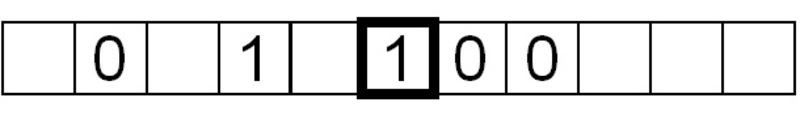

In [27]:
from IPython.display import Image
Image(r'https://www.cl.cam.ac.uk/projects/raspberrypi/tutorials/turing-machine/example_turing_tape.jpg')

A Turing Machine can
1. Read the symbol on the square under the head.
2. Edit the symbol by writing a new symbol or erasing it.
3. Move the tape left of right by one square so that the machine can read and edit the symbol on a neighbouring square.
4. Track the state of the program

### In practical terms - When is a language a 'real' programming languge
- Able to read and write data
- Able to refer to other variables using the head - loops, conditionals, etc
- Able to keep track of states of the program
- Able to eventually conclude

# <center> ----- HTML does <b> NONE </b> of those ----- </center> 

## Turing complete languages
- Python
- C
- C++
- Java
- Matlab
- R
- And many more

## Languages that are NOT Turing complete
- HTML
- SQL
- XML
- Latex
- Regex

### Back to HTML

In [ ]:
## Common tags
# <a> : defines a link
# <b> : bold text
# <center>
# <table>,<tbody>,<tr>,<td> : Table components
# <span>, <div>: Defines a section in a document
# <p>: paragraph

## Examples

In [38]:
%%html
<body>
  <p> This is first Paragraphs </p>
  <p> This is Second Paragraphs </p>
</body>

In [39]:
%%html
<body>
    <h1>Heading h1</h1>
    <h2>Heading h2</h2>
    <h3>Heading h3</h3>
    <h4>Heading h4</h4>
    <h5>Heading h5</h5>
    <h6>Heading h6</h6>
</body>

In [40]:
%%html
<body>
    <a href="https://github.com/natarajan1993">Nate&apos;s github page</a>
</body>

# <center> Our Objective is to get meaningful data from the code </center> 

 # <center> What is Beautiful Soup</center>
- A tool for efficiently getting data off websites - aka Web Scraping

In [41]:
# Without beautifulsoup
from html.parser import HTMLParser
from html.entities import name2codepoint

class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print("Start tag:", tag)
        for attr in attrs:
            print("     attr:", attr)

    def handle_endtag(self, tag):
        print("End tag  :", tag)

    def handle_data(self, data):
        print("Data     :", data)

    def handle_comment(self, data):
        print("Comment  :", data)

    def handle_entityref(self, name):
        c = chr(name2codepoint[name])
        print("Named ent:", c)

    def handle_charref(self, name):
        if name.startswith('x'):
            c = chr(int(name[1:], 16))
        else:
            c = chr(int(name))
        print("Num ent  :", c)

    def handle_decl(self, data):
        print("Decl     :", data)

parser = MyHTMLParser()
parser.feed('''<body>
  <p> This is first Paragraphs </p>
  <p> This is Second Paragraphs </p>
  </body>''')

Start tag: body
Data     : 
  
Start tag: p
Data     :  This is first Paragraphs 
End tag  : p
Data     : 
  
Start tag: p
Data     :  This is Second Paragraphs 
End tag  : p
Data     : 
  
End tag  : body


In [42]:
# With beautifulsoup
from bs4 import BeautifulSoup
soup = BeautifulSoup('''<body>
  <p>This is first Paragraphs</p>
  <p>This is Second Paragraphs</p>
</body>''','lxml')
print(soup.get_text())


This is first Paragraphs
This is Second Paragraphs



## Basic Framework

In [44]:
# Import the Beautifulsoup package
from bs4 import BeautifulSoup
# Import urlopen to open the website
from urllib.request import urlopen, Request

# We need to define the user agent so the server doesn't get suspicious
req = Request(r'https://en.wikipedia.org/wiki/Main_Page', headers={ 'User-Agent': 'Chrome/63.0.3239.132' })
# Open the page
page = urlopen(req)
# 'Soupify' the page and use a parser
soup = BeautifulSoup(page,'lxml')
# page
soup
# Do any and all further operations and data extraction after this

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Main_Page","wgTitle":"Main Page","wgCurRevisionId":807996266,"wgRevisionId":807996266,"wgArticleId":15580374,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShor

### For example

In [47]:
# We want the name of the featured article
soup.find('p').b.text

'Æthelflæd'

In [48]:
# We want all the links
[i['href'] for i in soup.findAll('a',href = True)]

['#mw-head',
 '#p-search',
 '/wiki/Wikipedia',
 '/wiki/Free_content',
 '/wiki/Encyclopedia',
 '/wiki/Wikipedia:Introduction',
 '/wiki/Special:Statistics',
 '/wiki/English_language',
 '/wiki/Portal:Arts',
 '/wiki/Portal:Biography',
 '/wiki/Portal:Geography',
 '/wiki/Portal:History',
 '/wiki/Portal:Mathematics',
 '/wiki/Portal:Science',
 '/wiki/Portal:Society',
 '/wiki/Portal:Technology',
 '/wiki/Portal:Contents/Portals',
 '/wiki/File:%C3%86thelfl%C3%A6d_as_depicted_in_the_cartulary_of_Abingdon_Abbey.png',
 '/wiki/%C3%86thelfl%C3%A6d',
 '/wiki/Circa',
 '/wiki/Mercia',
 '/wiki/English_Midlands',
 '/wiki/Alfred_the_Great',
 '/wiki/Wessex',
 '/wiki/%C3%86thelred,_Lord_of_the_Mercians',
 '/wiki/Vikings',
 '/wiki/Edward_the_Elder',
 '/wiki/Derby',
 '/wiki/Leicester',
 '/wiki/York',
 '/wiki/%C3%86lfwynn',
 '/wiki/%C3%86thelfl%C3%A6d',
 '/wiki/North_Ronaldsay_sheep',
 '/wiki/Maxinquaye',
 '/wiki/Dungeon_Siege',
 '/wiki/Wikipedia:Today%27s_featured_article/February_2018',
 'https://lists.wikimed

## The Parse Tree

In [31]:
doc = ['<html><head><title>Page title</title></head>',
       '<body><p id="firstpara" align="center">This is paragraph <b>one</b>.',
       '<p id="secondpara" align="blah">This is paragraph <b>two</b>.',
       '</html>']
soup = BeautifulSoup(''.join(doc),'lxml')

print (soup.prettify())

<html>
 <head>
  <title>
   Page title
  </title>
 </head>
 <body>
  <p align="center" id="firstpara">
   This is paragraph
   <b>
    one
   </b>
   .
  </p>
  <p align="blah" id="secondpara">
   This is paragraph
   <b>
    two
   </b>
   .
  </p>
 </body>
</html>


### parent attribute can move up the class

In [ ]:
soup.b.parent.name

### contents attribute can move down the class

In [ ]:
soup.p.contents

In [ ]:
# Nested contents attribute
print(type(soup.p.contents[1]))
soup.p.contents[1].contents

### nextSibling skips to the next element in the same level

In [ ]:
soup.head.nextSibling.name

### previousSibling skips to the previous element in the same level

In [ ]:
soup.body.previousSibling

### next and previous
- Move through the document elements in order
- Ignores levels

In [35]:
print(soup.head.next)
print(soup.head.nextSibling.name)
print(soup.head.previous)

<title>Page title</title>
body
<html><head><title>Page title</title></head><body><p align="center" id="firstpara">This is paragraph <b>one</b>.</p><p align="blah" id="secondpara">This is paragraph <b>two</b>.</p></body></html>


In [ ]:
# The soup object is an iterator
iter(soup.body)

In [ ]:
for i in soup.body:
    print (i)

### findChildren()
- finds all the children of the current tag

In [ ]:
soup.body.findChildren()

# Searching

## Useful Functions
- findAll(): returns a list of all the matches
- find(): returns the first match

### findall() basic usage

In [ ]:
# 1 - Simplest usage
soup.findAll('b')

In [ ]:
# 2 - Using regex within Beautifulsoup
import re
tagsStartingWithB = soup.findAll(re.compile('^b'))
[tag.name for tag in tagsStartingWithB]

In [ ]:
# 3 - Multiple tags
soup.findAll(['title', 'p'])

In [ ]:
# 4 - Find everything
soup.findAll()

In [ ]:
# 5 - More regex - find all tags with id that ends in 'para'
soup.findAll(id=re.compile("para$"))

### findall() attributes
- name : name of what we are searching
- attrs : attributes contained in the tags
- text : Returns matches as strings instead of objects
- limit : How many matches we want
- recursive : Whether to go all the way down the parse tree, or whether to only look at the immediate children

### The next most useful thing - CSS classes

In [ ]:
soup = BeautifulSoup("""Bob's <b>Bold</b> Barbeque Sauce now available in 
                        <b class="hickory">Hickory</b> and <b class="lime">Lime</a>""",'lxml')
print(soup.prettify())

In [ ]:
# Pass in the class as a dictionary
soup.find("b", { "class" : "lime" }) 

In [ ]:
soup.find("b", { "class" : "hickory" })

### Other (less useful functions)
- findNextSiblings()
- findPreviousSiblings()
- findAllPrevious()
- findAllNext()

## Scraping IMdB reviews

In [26]:
soup = BeautifulSoup(urlopen(r'http://www.imdb.com/title/tt1825683/reviews?ref_=tt_urv'),'lxml')
reviews = soup.findAll('div',{'class':'text'})
rating  = soup.findAll('span',{'class':'rating-other-user-rating'})
for rev in zip(reviews,rating):
    print(tuple(zip(rev[0].contents,rev[1].span.contents)))

(("First, this movie has a lot of pointless scenes that achieve nothing, the museum scene with pointless covert operation ending up in killing everyone anyway, that's so not Silent Assassin. The 007 Bond casino scene was just there to establish the most worthless character in movie history - Everett K. Ross. ", '6'),)
(("Ahhh here we go again, another Marvel film. And I know I'm probably going to annoy a lot of people but, this is my review and if people disagree good for them. Disappointing, great potential and I really, really wanted to like it but... I didn't. One of the most loved characters in the marvel universe butchered. In the comics T'Challa is portrayed as an intelligent and most importantly a serious character; however, if I were to meet him in real life I wouldn't have a clue what he'd be like, unlike almost any other marvel character such as Iron man, Captain America and even Ant Man etc. The protagonists in the film are undeveloped and this is most obvious when you compa

## Scraping Wikipedia Tables

In [ ]:
page = urlopen(r'https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Canada_and_the_United_States')
# 'Soupify' the page and use a parser
soup = BeautifulSoup(page,'lxml')
parsed_table_data = []
tables = soup.find("table", { "class" : "wikitable" })
for row in tables.findAll("tr"):
    children = row.findChildren(recursive=False)
    row_text = []
    for child in children:
        clean_text = child.text
        #This is to discard reference/citation links
        clean_text = clean_text.split('&#091;')[0]
        #This is to clean the header row of the sort icons
        clean_text = clean_text.split('&#160;')[-1]
        clean_text = clean_text.strip()
        row_text.append(clean_text)
    parsed_table_data.append(row_text)

In [ ]:
import pandas as pd
res = pd.DataFrame.from_records(parsed_table_data[1:],columns = parsed_table_data[0])
res

# <center> Eventually you will come across something like this </center>

In [ ]:
page = urlopen(r'https://www.apnews.com/')
soup = BeautifulSoup(page,'lxml')
soup

# <center> Oh No... What will we ever do now </center>

# Introducing Selenium
- Web automation tool
- Mostly used for automatically testing webpages
- Can be used to download dynamically loaded pages

In [1]:
from selenium import webdriver

- A driver is anything that can interface with the underlying browser
- There's a driver for almost all browsers


##  Basic Usage

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys # Used to send keyboard presses

driver = webdriver.Chrome() # Load the webdriver. Make sure it's in the same directory or give a path
driver.get("http://www.python.org") # Open a browser window and load the page
assert "Python" in driver.title # Make sure that the page has loaded
elem = driver.find_element_by_name("q") # Find the search field
elem.clear() # Clear anything in the field
elem.send_keys("pycon") # Type pycon in the search
elem.send_keys(Keys.RETURN) # Press enter
assert "No results found." not in driver.page_source # Make sure that there are some results
# driver.close()

## Switch to window

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("https://www.google.com")

# open a link in a new window
actions = ActionChains(driver)
about = driver.find_element_by_link_text('About')
actions.key_down(Keys.CONTROL).click(about).key_up(Keys.CONTROL).perform()

driver.switch_to.window(driver.window_handles[-1])
driver.get("https://stackoverflow.com")

## Finding elements
- find_element_by_id
- find_element_by_name
- find_element_by_xpath
- find_element_by_link_text
- find_element_by_partial_link_text
- find_element_by_tag_name
- find_element_by_class_name
- find_element_by_css_selector

## Filling forms

In [ ]:
from selenium.webdriver.support.ui import Select

driver = webdriver.Chrome()
driver.get(r'https://form.jotform.com/80524166859162')

prefix = driver.find_element_by_id(r'prefix_3')
prefix.clear()
prefix.send_keys('Mr')

first = driver.find_element_by_id(r'first_3')
first.clear()
first.send_keys('Nate')

last = driver.find_element_by_id(r'last_3')
last.clear()
last.send_keys('Mahalingam')

#input_5_addr_line1

addr_1 = driver.find_element_by_id(r'input_5_addr_line1')
addr_1.clear()
addr_1.send_keys('1234 New Street')

city = driver.find_element_by_id(r'input_5_city')
city.clear()
city.send_keys('New York City')

state = driver.find_element_by_id(r'input_5_state')
state.clear()
state.send_keys('New York')

post = driver.find_element_by_id(r'input_5_postal')
post.clear()
post.send_keys('12345')

country = Select(driver.find_element_by_name('q5_address5[country]'))
country.select_by_visible_text("United States")

area = driver.find_element_by_id(r'input_6_area')
area.clear()
area.send_keys('555')

ph = driver.find_element_by_id(r'input_6_phone')
ph.clear()
ph.send_keys('123456')

email = driver.find_element_by_id(r'input_4')
email.clear()
email.send_keys('dummyemail@domail.com')

bt = driver.find_element_by_id('input_2')
bt.click()

##  Finally... Waits

Waits tells the driver to wait a certain amount of time until it throws a timeout error
- Explicit waits : wait until a certain element appears
- Implicit waits : wait a certain amount of time IN GENERAL

In [7]:
# Explicit waits
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome()
driver.get("https://stackoverflow.com/")
try:
    wait = WebDriverWait(driver, 10) # wait until element is located OR 10 seconds
    element = wait.until(
        EC.visibility_of_element_located((By.ID, "nav-questions")) # Have the Expected Condition of finding a element
                                                                   # with the id nav-questions
        )
    element.click()
finally:
    driver.quit()

### Other Expected Conditions
- title_is
- title_contains
- presence_of_element_located
- visibility_of_element_located
- visibility_of
- presence_of_all_elements_located
- text_to_be_present_in_element
- text_to_be_present_in_element_value
- frame_to_be_available_and_switch_to_it
- invisibility_of_element_located
- element_to_be_clickable
- staleness_of
- element_to_be_selected
- element_located_to_be_selected
- element_selection_state_to_be
- element_located_selection_state_to_be
- alert_is_present

In [37]:
# Implicit waits
driver = webdriver.Chrome()
driver.implicitly_wait(5) # seconds
driver.get("https://stackoverflow.com/")
myDynamicElement = driver.find_element_by_id("nav-questions")
myDynamicElement.click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"srgwrgas"}
  (Session info: chrome=63.0.3239.132)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.16299 x86_64)


### Coming back to the AP example

In [8]:
driver = webdriver.Chrome()
driver.get(r'https://www.apnews.com/')
s1 = driver.find_elements_by_tag_name('h3')
s1[0].click()
print (driver.find_element_by_xpath("html").text)

background Menu

Florida Politics North America School shootings School safety Shootings Michael Pence Donald Trump AP Top News
Trump endorses raising minimum age to 21 for more weapons
By CATHERINE LUCEY and MATTHEW DALY
40 minutes ago
https://www.apnews.com/b1548e45aabf47d98e591f2c5afc38ef
WASHINGTON (AP) — President Donald Trump on Thursday endorsed a higher minimum age for buying certain rifles and tighter background checks for purchasers, saying “there’s nothing more important than protecting our children,” amid a public outcry for action after the Florida school shooting.
Trump said he spoke Wednesday night with many members of Congress and “they’re into background checks.” The president commented as he opened a school safety discussion at the White House with state and local officials from around the country.
Early Thursday, Trump tweeted his strongest stance on gun control one day after an emotional White House session where students and parents poured out wrenching tales of lo

# Bonus
## Google geocoding API

In [9]:
import googlemaps # need to pip install this first

 Get an API key
 https://developers.google.com/maps/documentation/geocoding/get-api-key

In [29]:
k = ''
with open(r'C:\Users\Natarajan\Desktop\key.txt') as f:
    k = f.read()
gmaps = googlemaps.Client(key=k)
geocode_result = gmaps.geocode('Columbia Mo')
print(geocode_result[0]['address_components'])
# print('Name:', geocode_result[0]['address_components'][0]['long_name'])
# print('County:', geocode_result[0]['address_components'][1]['long_name'])
# print('State:', geocode_result[0]['address_components'][2]['long_name'])
# print('Country:', geocode_result[0]['address_components'][3]['long_name'])

[{'long_name': 'Columbia', 'short_name': 'Columbia', 'types': ['locality', 'political']}, {'long_name': 'Boone County', 'short_name': 'Boone County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Missouri', 'short_name': 'MO', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}]
